<a href="https://colab.research.google.com/github/calosos/py_resumenes_codigos/blob/main/Trading_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.    Installation of libraries

In [1]:
!pip install fxcmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 


In [2]:
!pip install fxcmpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 3.8 MB/s 


In [4]:
!pip install --upgrade mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install pyti

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 2. Librarys

In [462]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl,plt
import fxcmpy

In [463]:
import mplfinance as mpf

In [464]:
from fxcmpy import  fxcmpy_tick_data_reader as tdr

In [465]:
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'
%matplotlib inline

In [466]:
from scipy import stats

In [467]:
import seaborn as sns
import matplotlib.pyplot as plt

In [468]:
from scipy.stats import iqr

In [469]:
from scipy.stats import skew, kurtosis

#3. Broker connection

D161558089 usuario 
kM3tl password

In [11]:
TOKEN = '71c091611d0281db76d7d9595aa08f8ad6ee1dce'

In [12]:
con = fxcmpy.fxcmpy(access_token='8030bef1dcbafa80e75ef40522559c442fa07d41', log_level='error')

#4. Instruments DataFrame 

In [291]:
instruments = con.get_instruments()
print(instruments)

6821 | EUR/USD | 2022-06-02 07:21:03.114000 | 1.06747, 1.06760
9787 | XAU/USD | 2022-06-02 07:21:03.128000 | 1850.49000, 1850.99000
9788 | XAU/USD | 2022-06-02 07:21:03.688000 | 1850.54000, 1851.03000
9789 | XAU/USD | 2022-06-02 07:21:04.059000 | 1850.54000, 1850.99000
6822 | EUR/USD | 2022-06-02 07:21:04.065000 | 1.06747, 1.06760
9790 | XAU/USD | 2022-06-02 07:21:04.629000 | 1850.53000, 1850.97000
6823 | EUR/USD | 2022-06-02 07:21:05.958000 | 1.06746, 1.06759
9791 | XAU/USD | 2022-06-02 07:21:05.704000 | 1850.51000, 1850.95000
2811 | BTC/USD | 2022-06-02 07:21:06.451000 | 29874.85000, 29914.85000
6824 | EUR/USD | 2022-06-02 07:21:06.583000 | 1.06746, 1.06759
9792 | XAU/USD | 2022-06-02 07:21:06.409000 | 1850.50000, 1850.96000
2812 | BTC/USD | 2022-06-02 07:21:06.977000 | 29873.15000, 29913.15000
6825 | EUR/USD | 2022-06-02 07:21:06.997000 | 1.06748, 1.06760
2813 | BTC/USD | 2022-06-02 07:21:07.447000 | 29874.00000, 29914.00000
6826 | EUR/USD | 2022-06-02 07:21:07.542000 | 1.06748, 1.0

In [292]:
df_instruments = pd.DataFrame(instruments, columns=['Instruments'])
df_instruments.size
df_instruments.head()

,Instruments
0,EUR/USD
1,USD/JPY
2,GBP/USD
3,USD/CHF
4,EUR/CHF


In [293]:
df_instruments_na=df_instruments.replace('', np.nan)
df_instruments_na.head()

,Instruments
0,EUR/USD
1,USD/JPY
2,GBP/USD
3,USD/CHF
4,EUR/CHF


In [294]:
df_instruments_dropna=df_instruments_na.dropna()
df_instruments_dropna.head()

9795 | XAU/USD | 2022-06-02 07:21:09.327000 | 1850.50000, 1850.95000
2815 | BTC/USD | 2022-06-02 07:21:09.226000 | 29875.20000, 29915.20000


,Instruments
0,EUR/USD
1,USD/JPY
2,GBP/USD
3,USD/CHF
4,EUR/CHF


In [295]:
df_instruments_clean=df_instruments_dropna.reset_index(inplace=False, drop=True)
df_instruments_clean

,Instruments
0,EUR/USD
1,USD/JPY
2,GBP/USD
3,USD/CHF
4,EUR/CHF
...,...
314,SNAP.us
315,SNOW.us
316,SPCE.us
317,XPEV.us


9796 | XAU/USD | 2022-06-02 07:21:09.742000 | 1850.45000, 1850.93000
6829 | EUR/USD | 2022-06-02 07:21:09.640000 | 1.06743, 1.06756
2816 | BTC/USD | 2022-06-02 07:21:10.338000 | 29876.00000, 29916.00000


In [18]:
df_instruments_clean

,Instruments
0,EUR/USD
1,USD/JPY
2,GBP/USD
3,USD/CHF
4,EUR/CHF
...,...
314,SNAP.us
315,SNOW.us
316,SPCE.us
317,XPEV.us


8319 | XAU/USD | 2022-06-02 06:59:14.452000 | 1852.05000, 1852.35000


#5.Lista de Instrumentos 

In [297]:
df_instrumenf_for_candle = pd.DataFrame(con.get_instruments_for_candles(), columns=['Instruments'])
df_instrumenf_for_candle

,Instruments
0,AUD/CAD
1,AUD/CHF
2,AUD/JPY
3,AUD/NZD
4,AUD/USD
...,...
64,FB.us
65,
66,NFLX.us
67,TSLA.us


#6.Parametros para obtener datos



Elegir Instrumento

In [393]:
#EUR/USD=22
#Oro  =59
#BTC/USD=61 ;
#Amazon=63; fb = 64; nfxl= 66
num_instrument=66
instrument = df_instrumenf_for_candle.at[num_instrument, 'Instruments']
instrument

'NFLX.us'

Elegir  Temporalidad

In [394]:
# # Available periods : 'm1', 'm5', 'm15', 'm30', 'H1', 'H2', 'H3', 'H4', 'H6', 'H8','D1', 'W1', or 'M1'.
timeframe = "D1" 

10000 | XAU/USD | 2022-06-02 07:35:36.253000 | 1851.68000, 1852.00000


Elegir número de peridos

In [492]:
numberofcandles = 100

In [493]:
data_candles = con.get_candles(instrument,period=timeframe, number=numberofcandles)
data_candles.tail()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2022-05-23 21:00:00,186.23,187.27,187.37,177.63,186.56,187.60,187.85,178.23,53651
2022-05-24 21:00:00,187.27,180.17,183.70,176.84,187.60,180.50,184.69,177.43,45480
2022-05-25 21:00:00,180.17,187.63,188.67,179.28,180.50,187.96,189.28,180.42,56583
2022-05-26 21:00:00,187.63,191.20,192.11,182.81,187.96,191.53,192.51,183.36,42929
2022-05-31 21:00:00,195.85,197.30,199.72,190.49,196.73,197.63,200.15,191.03,53330


##6.1Limpieza de Tabla 

In [494]:
candles_2 = data_candles[data_candles.columns[:4]] 
candles_bid=candles_2.rename(columns={"bidopen": "Open", "bidclose": "Close",'bidhigh':'High','bidlow':'Low'})
candles_bid.tail()
candles_bid.shape

(100, 4)

In [495]:
candles_2 = data_candles[data_candles.columns[4:8]] 
candles_ask=candles_2.rename(columns={"askopen": "Open", "askclose": "Close",'askhigh':'High','asklow':'Low'})
candles_ask.tail()
candles_ask.shape

10000 | EUR/USD | 2022-06-02 08:53:08.282000 | 1.06910, 1.06922
10000 | XAU/USD | 2022-06-02 08:53:08.015000 | 1850.74000, 1851.11000


(100, 4)

#Start

<Mpf_Figure size 2000x1400 with 0 Axes>

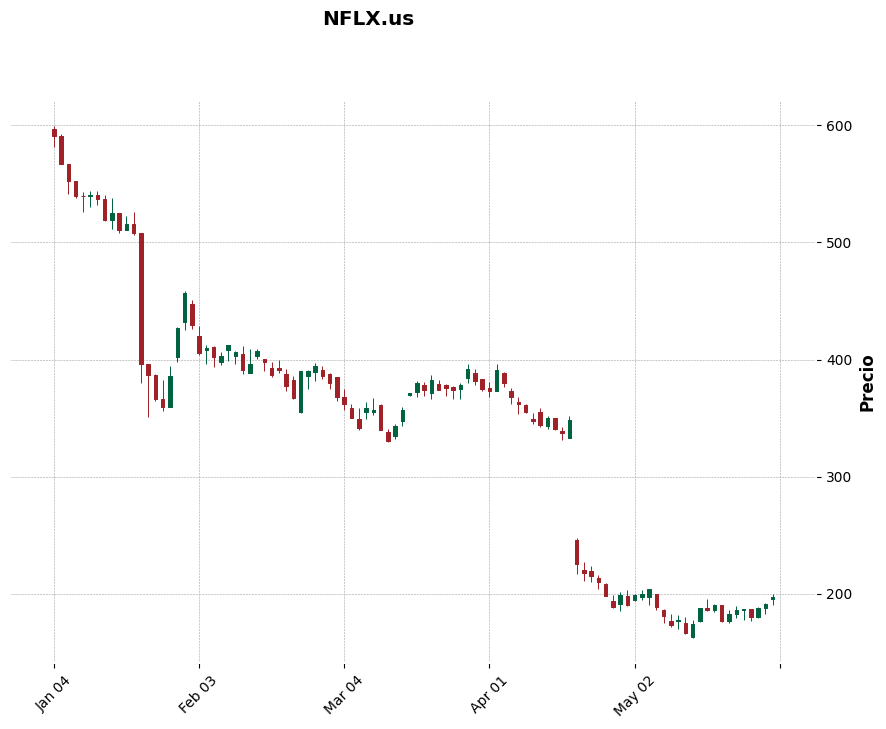

In [496]:
mpf.figure(figsize=(20, 14))
mpf.plot(candles_bid, type='candle', style='charles', title= instrument, ylabel= 'Precio', figscale=1.4);

In [497]:
candles_bid['Mid']=candles_bid[['Open','Close']].mean(axis=1)
candles_bid.head(3)

,Open,Close,High,Low,Mid
date,,,,,
2022-01-04 22:00:00,596.95,590.88,599.76,581.23,593.915
2022-01-05 22:00:00,590.88,566.95,592.53,566.63,578.915
2022-01-06 22:00:00,566.95,552.85,562.89,541.37,559.900


Calcular el precio promedio de cada periodo

10000 | EUR/USD | 2022-06-02 08:53:27.830000 | 1.06887, 1.06901


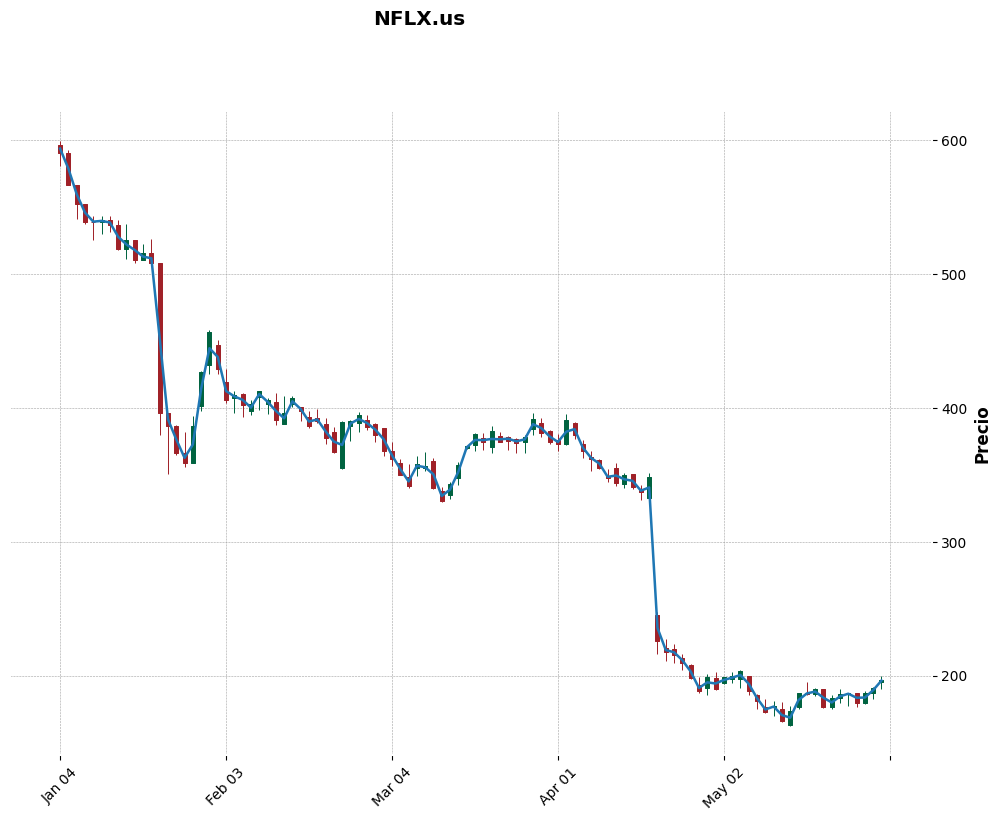

In [498]:
apdict = mpf.make_addplot(candles_bid['Mid'])
mpf.plot(candles_bid, type='candle', style='charles', title= instrument, ylabel= 'Precio', addplot=apdict,figscale=1.6);

#mpf.plot(candles_bid,volume=True,addplot=apdict)

último precio promedio 

In [499]:
candles_bid.tail(1)

,Open,Close,High,Low,Mid
date,,,,,
2022-05-31 21:00:00,195.85,197.3,199.72,190.49,196.575


##Conectar para adquir datos

In [500]:
def output(data, dataframe):
  print('%3d | %s | %s | %6.5f, %6.5f'
    % (len(dataframe), data['Symbol'],
      pd.to_datetime(int(data['Updated']), unit='ms'),
      data['Rates'][0], data['Rates'][1]))

10000 | EUR/USD | 2022-06-02 08:53:34.352000 | 1.06886, 1.06900


In [501]:
con.subscribe_market_data(instrument, (output,))

Usar solo cúando se vaya a desconectar de los  datos

In [502]:
#con.unsubscribe_market_data(instrument)

In [503]:
con.get_subscribed_symbols()

5436 | BTC/USD | 2022-06-02 08:53:36.855000 | 29918.00000, 29958.00000


['XAU/USD', 'EUR/USD', 'BTC/USD', 'AMZN.us', 'FB.us', 'NFLX.us']

In [504]:
con.get_last_price(instrument)

Bid     192.72
Ask     193.05
High    191.37
Low     202.91
Name: 2022-06-01 20:14:58.961000, dtype: float64

#7.Estimados de locación

##Promedio 

In [505]:
promedio =candles_bid['Mid'].mean()
print(f'El promedio es: {promedio}')

El promedio es: 346.23599999999993


##Mediana

In [506]:
mediana =candles_bid['Mid'].median()
print(f'La mediana es: {mediana}')

La mediana es: 373.84000000000003


##Media Truncada

In [507]:
media_truncada = stats.trim_mean(candles_bid['Mid'], 0.1)   
print(f'La media truncada: {media_truncada}')

La media truncada: 342.11831249999994


5439 | BTC/USD | 2022-06-02 08:53:42.360000 | 29915.50000, 29955.50000


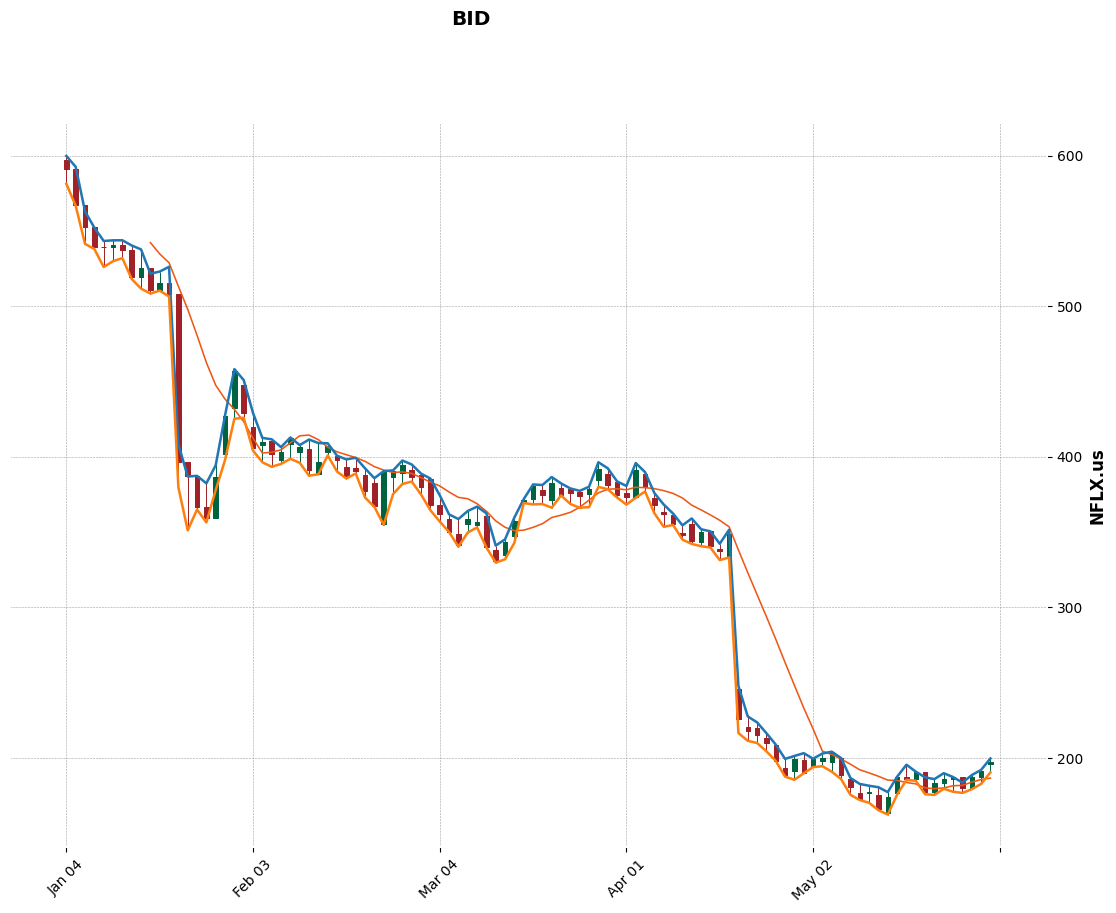

In [508]:
tcdf = candles_bid[['High','Low']]  # DataFrame with two columns
apd  = mpf.make_addplot(tcdf)
mpf.plot(candles_bid, type='candle', style='charles', title= 'BID', ylabel= instrument, addplot=apd, mav=10, figscale=1.8) ;

## Valores Atípicos

##Desviación Estándar

In [509]:
std_candles =candles_bid['Mid'].std()
print(f'Desviación estandar: {std_candles}')

Desviación estandar: 111.74158797119014


##Rango

In [510]:
rango = candles_bid['Mid'].max() - candles_bid['Mid'].min()
rango

425.06999999999994

## Percentiles

In [511]:
percentil = candles_bid['Mid'].quantile(0.8)

In [512]:
f'En este caso, el 80% de los valores en nuestro conjunto de datos tienen un valor menor o igual a {percentil}.'

'En este caso, el 80% de los valores en nuestro conjunto de datos tienen un valor menor o igual a 405.4.'

En este caso, el 80% de los valores en nuestro conjunto de datos tienen un valor menor o igual a 1 440 000.

In [513]:
print(f'Valor mínimo: {candles_bid["Mid"].min()}')
print(f'Percentil 10: {candles_bid["Mid"].quantile(0.1)}')
print(f'Percentil 25: {candles_bid["Mid"].quantile(0.25)}')
print(f'Percentil 50: {candles_bid["Mid"].median()}')
print(f'Percentil 75: {candles_bid["Mid"].quantile(0.75)}')
print(f'Percentil 90: {candles_bid["Mid"].quantile(0.9)}')
print(f'Valor máximo: {candles_bid["Mid"].max()}')

Valor mínimo: 168.845
Percentil 10: 184.6695
Percentil 25: 216.21999999999997
Percentil 50: 373.84000000000003
Percentil 75: 393.86625000000004
Percentil 90: 513.724
Valor máximo: 593.915


## Rango intercuartílico

In [514]:
candles_bid["Mid"].quantile(0.75) - candles_bid["Mid"].quantile(0.25)

10000 | XAU/USD | 2022-06-02 08:54:12.738000 | 1850.62000, 1850.95000


177.64625000000007

#8.Distribuciones

Text(0.5, 0, 'Precio promedio')

10000 | XAU/USD | 2022-06-02 08:54:14.199000 | 1850.76000, 1851.14000


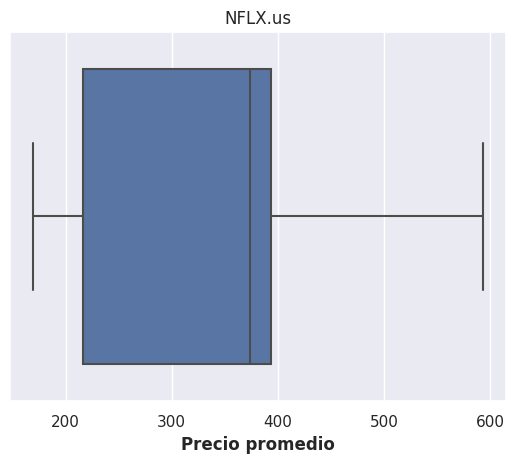

In [515]:
sns.set(style="darkgrid");
ax=sns.boxplot(x=candles_bid["Mid"]);
ax.set_title(f'{instrument}')
ax.set_xlabel('Precio promedio')

Text(0.5, 28.0, 'Precio promedio')

5448 | BTC/USD | 2022-06-02 08:54:18.223000 | 29916.70000, 29956.70000


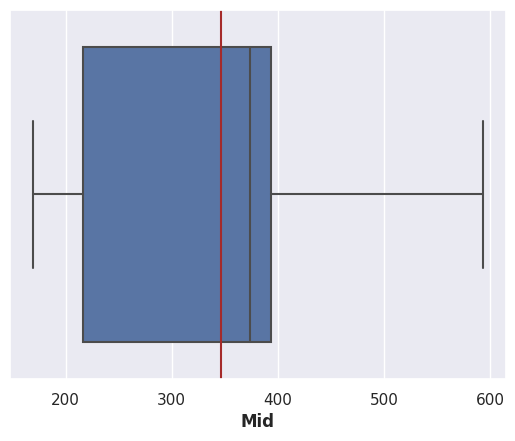

In [516]:
sns.set(style="darkgrid")
sns.boxplot(x=candles_bid["Mid"])
plt.axvline(candles_bid["Mid"].mean(), c='brown')
ax.set_title(f'{instrument}')
ax.set_xlabel('Precio promedio')

In [517]:
iqr_uno = iqr(candles_bid["Mid"])
iqr_uno

TypeError: ignored

In [518]:
iqr = candles_bid["Mid"].quantile(0.75) - candles_bid["Mid"].quantile(0.25)
filtro_inferior = candles_bid["Mid"]> candles_bid["Mid"].quantile(0.25) - (iqr * 1.5)
filtro_superior = candles_bid["Mid"] < candles_bid["Mid"].quantile(0.75) + (iqr * 1.5)

df_filtrado = candles_bid[filtro_inferior & filtro_superior]
df_filtrado.shape

(100, 5)

10000 | XAU/USD | 2022-06-02 08:54:23.978000 | 1850.65000, 1851.06000


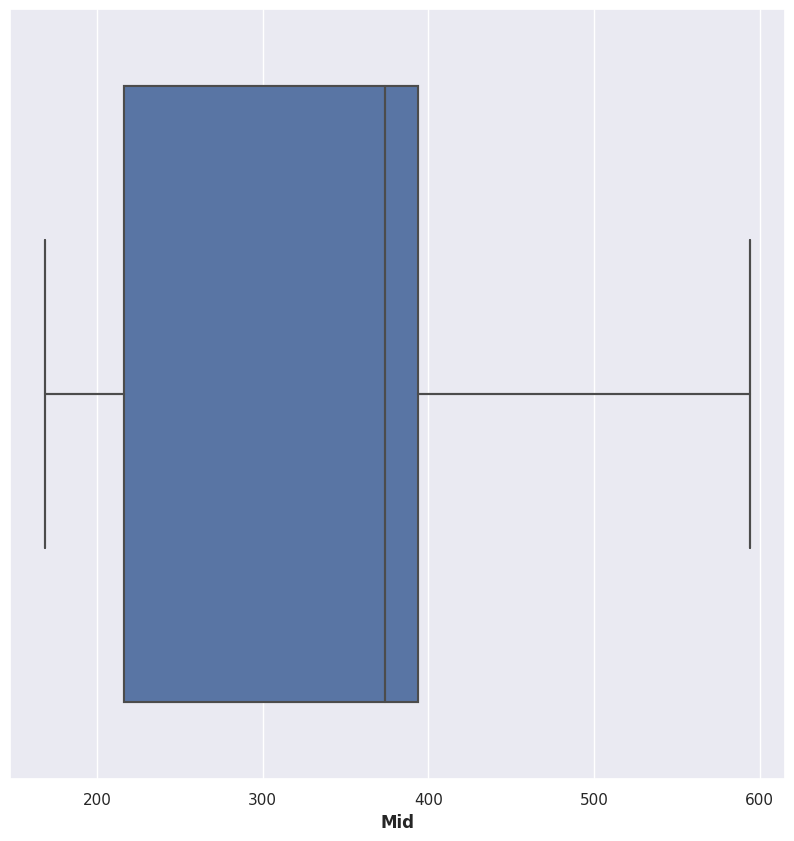

In [519]:
fig = plt.figure(figsize=(10, 10))
sns.set(style="darkgrid")
sns.boxplot(x=df_filtrado['Mid'])
sns.boxplot(x=candles_bid["Mid"])


## Tabla de frecuencias

In [520]:
mid = candles_bid["Mid"]

In [521]:
segmentos = pd.cut(mid, 20)
candles_bid["Mid"].groupby(segmentos).count()

Mid
(168.42, 190.098]     15
(190.098, 211.352]     9
(211.352, 232.605]     3
(232.605, 253.859]     1
(253.859, 275.112]     0
(275.112, 296.366]     0
(296.366, 317.619]     0
(317.619, 338.873]     2
(338.873, 360.126]    13
(360.126, 381.38]     19
(381.38, 402.633]     16
(402.633, 423.887]     7
(423.887, 445.14]      2
(445.14, 466.394]      1
(466.394, 487.647]     0
(487.647, 508.901]     0
(508.901, 530.154]     5
(530.154, 551.408]     4
(551.408, 572.661]     1
(572.661, 593.915]     2
Name: Mid, dtype: int64

##Histogramas

https://www.tradingsys.org/histograma-de-operaciones-y-curva-normal

Text(0.5, 0, 'Precio promedio')

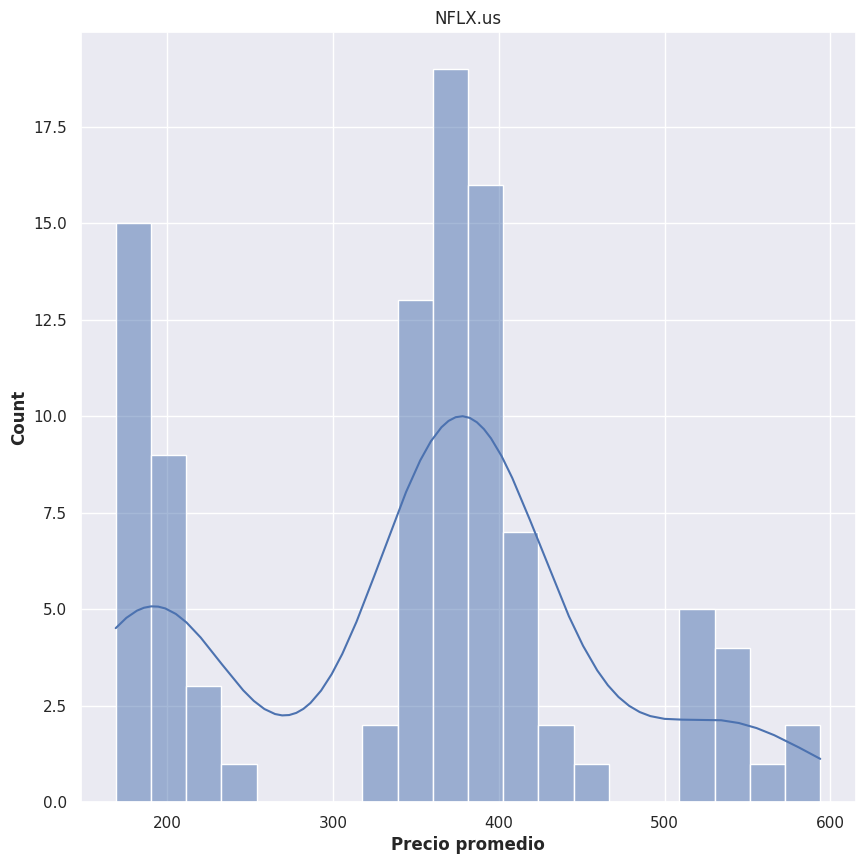

In [522]:
fig = plt.figure(figsize=(10, 10))
ax =sns.histplot(candles_bid["Mid"], kde=True,  bins=20);
ax.set_title(f'{instrument}')
ax.set_xlabel('Precio promedio')

In [523]:
print(f'Curtosis: {kurtosis(candles_bid["Mid"])}')
print(f'Asimetría: {skew(candles_bid["Mid"])}')

10000 | EUR/USD | 2022-06-02 08:54:31.068000 | 1.06882, 1.06896
10000 | XAU/USD | 2022-06-02 08:54:31.111000 | 1850.80000, 1851.15000
Curtosis: -0.6384975013597955
Asimetría: -0.041824509974830025



- Números negativos indican que hay una asimetría negativa, es decir que la cola de la izquierda es más larga que la cola de la derecha.

- Curtosis negativa indica que nuestra distribución está escarpada. Esto implica que hay menos dispersión de nuestros datos, que están más cercanos a nuestro punto central y que por lo tanto tenemos colas cortas (comparadas con la cola normal).

##Gráficas de densidad

In [366]:
fb = candles_bid["Mid"]

7589 | EUR/USD | 2022-06-02 07:32:45.407000 | 1.06783, 1.06797
10000 | XAU/USD | 2022-06-02 07:32:45.509000 | 1850.47000, 1850.78000
10000 | XAU/USD | 2022-06-02 07:32:45.957000 | 1850.43000, 1850.73000


In [367]:
fb.tail()

date
2022-05-23 21:00:00    194.79
2022-05-24 21:00:00    188.49
2022-05-25 21:00:00    182.28
2022-05-26 21:00:00    187.53
2022-05-31 21:00:00    194.14
Name: Mid, dtype: float64

In [408]:
netflix = candles_bid["Mid"]

In [409]:
netflix.tail()

date
2022-05-23 21:00:00    186.750
2022-05-24 21:00:00    183.720
2022-05-25 21:00:00    183.900
2022-05-26 21:00:00    189.415
2022-05-31 21:00:00    196.575
Name: Mid, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Precio promedio')

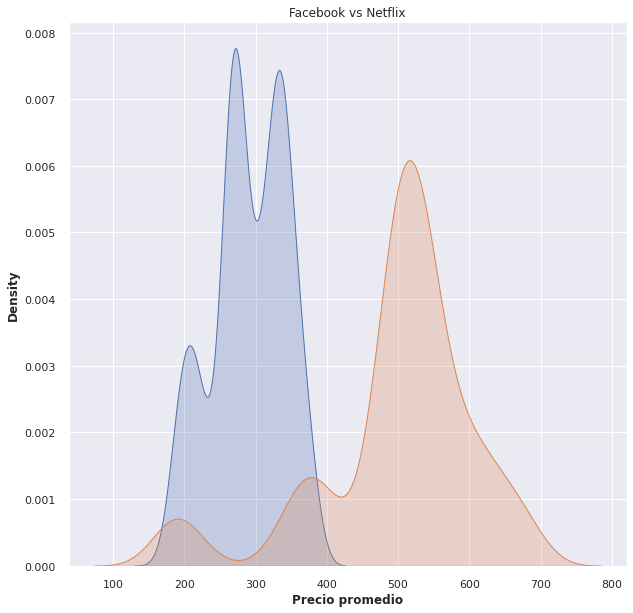

In [486]:
fig = plt.figure(figsize=(10, 10))
ax =sns.distplot(fb, hist = False, kde_kws = {'shade': True}) #azul
sns.distplot(netflix, hist = False, kde_kws = {'shade': True})
ax.set_title(f'Facebook vs Netflix')
ax.set_xlabel('Precio promedio')

#9.Exploración de Variables Categóricas y Análisis Multivariable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


10000 | XAU/USD | 2022-06-02 08:14:54.158000 | 1851.75000, 1852.05000


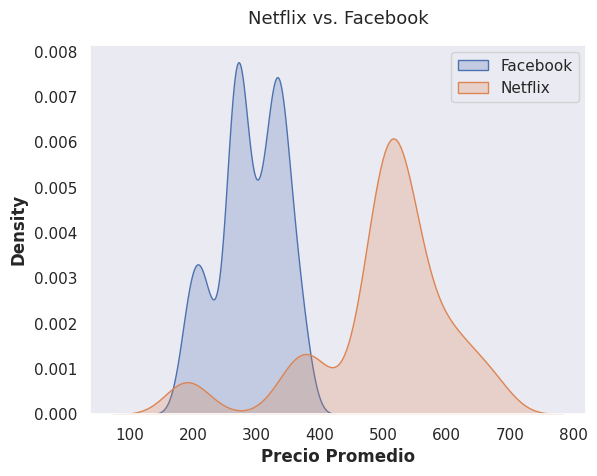

In [423]:
ax=sns.distplot(fb, hist = False, kde_kws = {'shade': True}, label= 'Facebook') #azul
sns.distplot(netflix, hist = False, kde_kws = {'shade': True},label='Netflix', ax=ax)
ax.set_title('Netflix vs. Facebook', fontsize=13, pad=15)
ax.set(xlabel='Precio Promedio');
ax.legend(loc='upper right');

Se regresa a usar el último instrumento vigente

4632 | BTC/USD | 2022-06-02 08:19:10.838000 | 29958.30000, 29998.30000
10000 | EUR/USD | 2022-06-02 08:19:10.990000 | 1.06893, 1.06905
10000 | XAU/USD | 2022-06-02 08:19:10.921000 | 1852.08000, 1852.41000


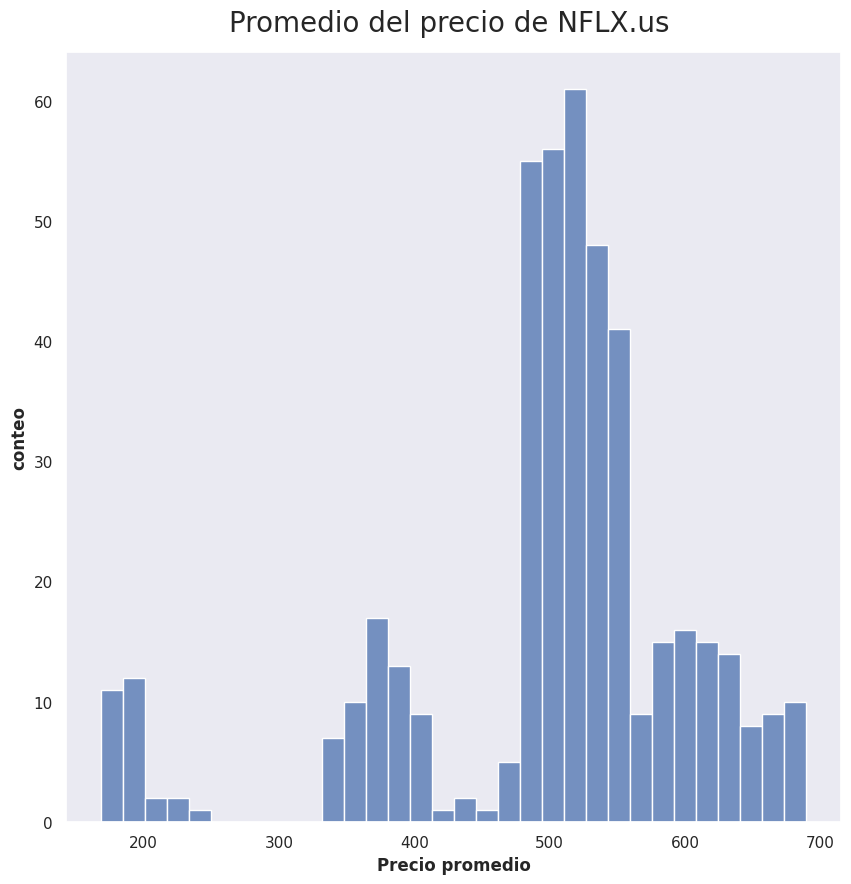

In [426]:
fig = plt.figure(figsize=(10, 10))
ax = sns.histplot(candles_bid["Mid"], kde=False)
ax.set_title(f'Promedio del precio de {instrument} ', fontsize=20, pad=15)
ax.set(xlabel='Precio promedio', ylabel='conteo');

In [429]:
candles_bid["Mid"].mode()

10000 | EUR/USD | 2022-06-02 08:22:01.257000 | 1.06915, 1.06928
10000 | XAU/USD | 2022-06-02 08:22:01.068000 | 1852.37000, 1852.70000


0      168.845
1      170.800
2      174.990
3      177.145
4      180.215
        ...   
445    682.765
446    683.155
447    685.385
448    686.425
449    689.360
Length: 450, dtype: float64

10000 | EUR/USD | 2022-06-02 08:39:40.943000 | 1.06909, 1.06922
5174 | BTC/USD | 2022-06-02 08:39:41.216000 | 29918.25000, 29958.25000


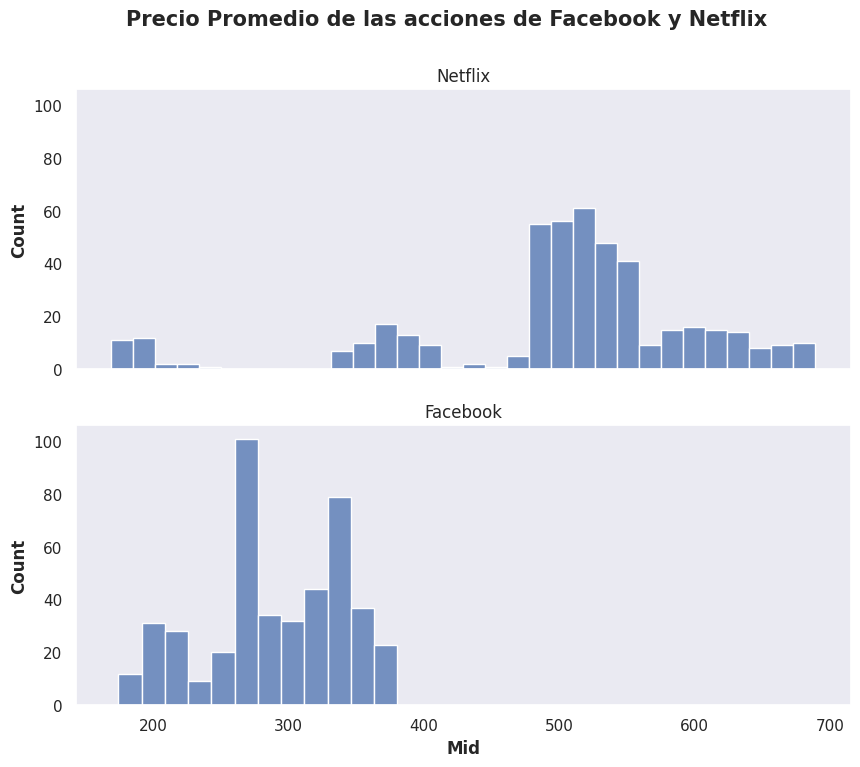

In [444]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True)
axes[0].set(xlabel='', ylabel='', title='Netflix')
axes[1].set(xlabel='', ylabel='', title='Facebook')

sns.histplot(netflix, ax=axes[0])
sns.histplot(fb, ax=axes[1])


fig.suptitle('Precio Promedio de las acciones de Facebook y Netflix ', fontsize=15);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Precio Promedio')

10000 | EUR/USD | 2022-06-02 08:43:15.518000 | 1.06912, 1.06925
10000 | XAU/USD | 2022-06-02 08:43:15.269000 | 1851.05000, 1851.44000
5239 | BTC/USD | 2022-06-02 08:43:15.613000 | 29910.00000, 29950.00000


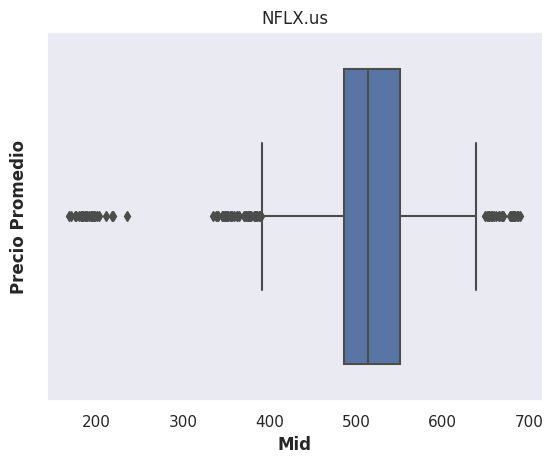

In [448]:
ax = sns.boxplot(candles_bid["Mid"])
ax.set_title(f'{instrument}')
ax.set_ylabel('Precio Promedio')

10000 | XAU/USD | 2022-06-02 08:52:11.882000 | 1850.53000, 1850.91000


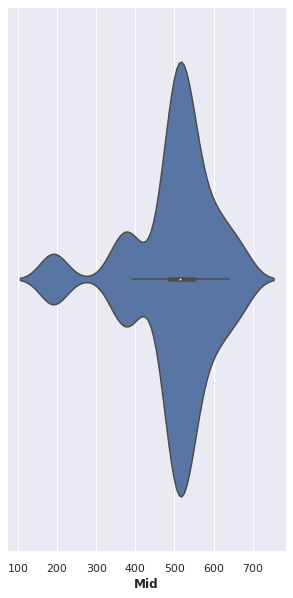

In [489]:
plt.figure(figsize=(5, 10))
sns.violinplot(data=candles_bid, x='Mid');

#10.Correlaciones y Regresión Linear Simple

#Real-Time SMA Crossover Strategy

https://docs.python.org/es/3/library/datetime.html
https://www.programiz.com/python-programming/datetime/current-datetime 
https://pandas.pydata.org/docs/reference/api
https://github.com/matplotlib/mplfinance/blob/master/examples/panels.ipynb
https://github.com/fxcm/RestAPI/blob/master/Europe-Algo-Meetup/EMA%20Crossover%20Strategy%20and%20Backtesting.ipynb
https://github.com/fxcm/RestAPI/blob/master/Europe-Algo-Meetup/Real-Time%20SMA%20Crossover%20Strategy.ipynb/
